In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium # map rendering library

print('Libraries imported.')

Libraries imported.



https://en.wikipedia.org/wiki/Quarters_of_Paris

https://france-geojson.gregoiredavid.fr/

https://theearfultower.com/2018/06/06/the-top-paris-arrondissements-for-tourists-ranked-from-worst-to-best/

https://frenchmoments.eu/arrondissements-of-paris/

https://github.com/zak-art-515/battle-of-neighborhoods/blob/master/BON_PARIS.ipynb

https://www.statista.com/statistics/769062/rent-the-metre-square-apartments-by-districts-paris-la-france/

# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an **Italian restaurant** in **paris**, France.
Paris has in total 20 boroughs (called arrondissements in French) and 80 neighborhoods (4 neighborhoods for each borough).
Various factors need to be studied in order to decide on the location such as:

* Italian restaurants in vicinity
* Total restaurants in vicinity
* Paris Population
* Median household income for the neighborhoods
* Average rent in the area
* Area popularity

The analysis and recommendations for new Italian restaurant locations will focus on general neighborhoods with these establishments, not on specific addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the stakeholders.

## Data <a name="data"></a>

Following data sources will be needed to extract/generate the required information:

* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* In order to get latitude and longitude values of Paris we use geopy library
* Data set of paris quartier obtained from: https://opendata.paris.fr/explore/dataset/quartier_paris/information/
* Data set of paris arrondissements obtained from: https://www.data.gouv.fr/en/datasets/arrondissements-1/
* The relevant data of Paris Population and Median household income for each arrondissements obtained from: https://frenchmoments.eu/arrondissements-of-paris/
* Data set of Average rent in each arrondissements obtained from: https://www.statista.com/statistics/769062/rent-the-metre-square-apartments-by-districts-paris-la-france/
* The rank that was given for each arrondissements based on the data from: https://theearfultower.com/2018/06/06/the-top-paris-arrondissements-for-tourists-ranked-from-worst-to-best/

## Download and Explore city of Paris geographical coordinates dataset

Paris has a total of 20 boroughs (arrondissements in french) and 80 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 20 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.



#### Get the data set of paris quartier

In [3]:
with open('quartier_paris.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [4]:
newyork_data

[{'datasetid': 'quartier_paris',
  'recordid': 'e43bbf3675b90df6cafa05a01541fa368d007ac7',
  'fields': {'n_sq_qu': 750000021,
   'perimetre': 2391.1228183,
   'geom_x_y': [48.8543844036, 2.34003537113],
   'c_qu': 21,
   'surface': 293360.5723113,
   'l_qu': 'Monnaie',
   'geom': {'type': 'Polygon',
    'coordinates': [[[2.343168550439539, 48.85138855000365],
      [2.342677870551298, 48.850357652304076],
      [2.341305855693479, 48.85088325822361],
      [2.341184376257707, 48.85087740369368],
      [2.340844428336918, 48.85106994891613],
      [2.340506889630401, 48.851281585383134],
      [2.3402349782103, 48.851470698644924],
      [2.339729174030643, 48.85195038527006],
      [2.339461015584085, 48.852111171502024],
      [2.339161019159428, 48.852291044584604],
      [2.338941424289083, 48.85242270958092],
      [2.33698866720655, 48.852901959413856],
      [2.336959933858708, 48.8538108882516],
      [2.3369724447306313, 48.85392946825931],
      [2.336773070228429, 48.85529816

####  Transform the data into a *pandas* dataframe

In [5]:
quartier_paris=pd.json_normalize(newyork_data)
quartier_paris

,datasetid,recordid,record_timestamp,fields.n_sq_qu,fields.perimetre,fields.geom_x_y,fields.c_qu,fields.surface,fields.l_qu,fields.geom.type,fields.geom.coordinates,fields.n_sq_ar,fields.c_quinsee,fields.c_ar,geometry.type,geometry.coordinates
0,quartier_paris,e43bbf3675b90df6cafa05a01541fa368d007ac7,2020-04-01T13:00:57.071+03:00,750000021,2391.122818,"[48.8543844036, 2.34003537113]",21,2.933606e+05,Monnaie,Polygon,"[[[2.343168550439539, 48.85138855000365], [2.3...",750000006,7510601,6,Point,"[2.34003537113, 48.8543844036]"
1,quartier_paris,54f229d9b4bb8426ad13c853e443c4728c34f375,2020-04-01T13:00:57.071+03:00,750000022,3516.314464,"[48.8478006293, 2.33633882759]",22,7.161484e+05,Odéon,Polygon,"[[[2.33698866720655, 48.852901959413856], [2.3...",750000006,7510602,6,Point,"[2.33633882759, 48.8478006293]"
2,quartier_paris,4bd0d51d857a08136619d5dbce5d119dc4d4aeb1,2020-04-01T13:00:57.071+03:00,750000029,5480.652870,"[48.8670744922, 2.30865168468]",29,1.140254e+06,Champs-Elysées,Polygon,"[[[2.306463844245763, 48.87014801524102], [2.3...",750000008,7510801,8,Point,"[2.30865168468, 48.8670744922]"
3,quartier_paris,d088d5e5042d724ac17b61f5b9b36264481caca7,2020-04-01T13:00:57.071+03:00,750000051,6814.373288,"[48.8231278057, 2.35243314954]",51,2.231506e+06,Maison-Blanche,Polygon,"[[[2.349115013991671, 48.82959683468229], [2.3...",750000013,7511303,13,Point,"[2.35243314954, 48.8231278057]"
4,quartier_paris,53462361713bf4f022723cf471d8433ea0119e1d,2020-04-01T13:00:57.071+03:00,750000052,3289.230480,"[48.8337336761, 2.34767304607]",52,6.920677e+05,Croulebarbe,Polygon,"[[[2.3516626011261312, 48.83678001274327], [2....",750000013,7511304,13,Point,"[2.34767304607, 48.8337336761]"
5,quartier_paris,b0062cec1c080672704523cd9166fcacdb072959,2020-04-01T13:00:57.071+03:00,750000048,4509.486974,"[48.8469159441, 2.37440162648]",48,1.235916e+06,Quinze-Vingts,Polygon,"[[[2.373204762234059, 48.84057029369178], [2.3...",750000012,7511204,12,Point,"[2.37440162648, 48.8469159441]"
6,quartier_paris,e0178ba4b811a3adcecdd438c09224743e25f24f,2020-04-01T13:00:57.071+03:00,750000041,3724.352694,"[48.8674031901, 2.37296482493]",41,7.257525e+05,Folie-Méricourt,Polygon,"[[[2.370102644458916, 48.86376465252297], [2.3...",750000011,7511101,11,Point,"[2.37296482493, 48.8674031901]"
7,quartier_paris,d7fc2b0fb947374330fa5fb1b03d1d22c6e88aae,2020-04-01T13:00:57.071+03:00,750000049,4759.096239,"[48.8374058852, 2.36331863515]",49,1.181560e+06,Salpêtrière,Polygon,"[[[2.356363453081923, 48.83103873373539], [2.3...",750000013,7511301,13,Point,"[2.36331863515, 48.8374058852]"
8,quartier_paris,83444fc12fcef6c694f4e99dd7b201044e6ebc12,2020-04-01T13:00:57.071+03:00,750000004,2147.817602,"[48.8670185906, 2.32858166493]",4,2.694568e+05,Place-Vendôme,Polygon,"[[[2.3319449693932333, 48.86491285292421], [2....",750000001,7510104,1,Point,"[2.32858166493, 48.8670185906]"
9,quartier_paris,4199a456fd168f403e57805c5b885a1ab111660d,2020-04-01T13:00:57.071+03:00,750000076,4435.273252,"[48.8786390757, 2.38012728183]",76,1.294988e+06,Combat,Polygon,"[[[2.388343313526396, 48.88056667377271], [2.3...",750000019,7511904,19,Point,"[2.38012728183, 48.8786390757]"


In [6]:
# Extract the Latitude and Longitude for each quartier and set the values in new columns
for i in range(len(quartier_paris)):
    quartier_paris.loc[i,'Latitude']=quartier_paris.loc[i,'geometry.coordinates'][1]
    quartier_paris.loc[i,'Longitude']=quartier_paris.loc[i,'geometry.coordinates'][0]
quartier_paris.drop('geometry.coordinates',1,inplace=True)

# convert the features to float type
quartier_paris['Latitude']=quartier_paris['Latitude'].astype(float)
quartier_paris['Longitude']=quartier_paris['Longitude'].astype(float)

quartier_paris

,datasetid,recordid,record_timestamp,fields.n_sq_qu,fields.perimetre,fields.geom_x_y,fields.c_qu,fields.surface,fields.l_qu,fields.geom.type,fields.geom.coordinates,fields.n_sq_ar,fields.c_quinsee,fields.c_ar,geometry.type,Latitude,Longitude
0,quartier_paris,e43bbf3675b90df6cafa05a01541fa368d007ac7,2020-04-01T13:00:57.071+03:00,750000021,2391.122818,"[48.8543844036, 2.34003537113]",21,2.933606e+05,Monnaie,Polygon,"[[[2.343168550439539, 48.85138855000365], [2.3...",750000006,7510601,6,Point,48.854384,2.340035
1,quartier_paris,54f229d9b4bb8426ad13c853e443c4728c34f375,2020-04-01T13:00:57.071+03:00,750000022,3516.314464,"[48.8478006293, 2.33633882759]",22,7.161484e+05,Odéon,Polygon,"[[[2.33698866720655, 48.852901959413856], [2.3...",750000006,7510602,6,Point,48.847801,2.336339
2,quartier_paris,4bd0d51d857a08136619d5dbce5d119dc4d4aeb1,2020-04-01T13:00:57.071+03:00,750000029,5480.652870,"[48.8670744922, 2.30865168468]",29,1.140254e+06,Champs-Elysées,Polygon,"[[[2.306463844245763, 48.87014801524102], [2.3...",750000008,7510801,8,Point,48.867074,2.308652
3,quartier_paris,d088d5e5042d724ac17b61f5b9b36264481caca7,2020-04-01T13:00:57.071+03:00,750000051,6814.373288,"[48.8231278057, 2.35243314954]",51,2.231506e+06,Maison-Blanche,Polygon,"[[[2.349115013991671, 48.82959683468229], [2.3...",750000013,7511303,13,Point,48.823128,2.352433
4,quartier_paris,53462361713bf4f022723cf471d8433ea0119e1d,2020-04-01T13:00:57.071+03:00,750000052,3289.230480,"[48.8337336761, 2.34767304607]",52,6.920677e+05,Croulebarbe,Polygon,"[[[2.3516626011261312, 48.83678001274327], [2....",750000013,7511304,13,Point,48.833734,2.347673
5,quartier_paris,b0062cec1c080672704523cd9166fcacdb072959,2020-04-01T13:00:57.071+03:00,750000048,4509.486974,"[48.8469159441, 2.37440162648]",48,1.235916e+06,Quinze-Vingts,Polygon,"[[[2.373204762234059, 48.84057029369178], [2.3...",750000012,7511204,12,Point,48.846916,2.374402
6,quartier_paris,e0178ba4b811a3adcecdd438c09224743e25f24f,2020-04-01T13:00:57.071+03:00,750000041,3724.352694,"[48.8674031901, 2.37296482493]",41,7.257525e+05,Folie-Méricourt,Polygon,"[[[2.370102644458916, 48.86376465252297], [2.3...",750000011,7511101,11,Point,48.867403,2.372965
7,quartier_paris,d7fc2b0fb947374330fa5fb1b03d1d22c6e88aae,2020-04-01T13:00:57.071+03:00,750000049,4759.096239,"[48.8374058852, 2.36331863515]",49,1.181560e+06,Salpêtrière,Polygon,"[[[2.356363453081923, 48.83103873373539], [2.3...",750000013,7511301,13,Point,48.837406,2.363319
8,quartier_paris,83444fc12fcef6c694f4e99dd7b201044e6ebc12,2020-04-01T13:00:57.071+03:00,750000004,2147.817602,"[48.8670185906, 2.32858166493]",4,2.694568e+05,Place-Vendôme,Polygon,"[[[2.3319449693932333, 48.86491285292421], [2....",750000001,7510104,1,Point,48.867019,2.328582
9,quartier_paris,4199a456fd168f403e57805c5b885a1ab111660d,2020-04-01T13:00:57.071+03:00,750000076,4435.273252,"[48.8786390757, 2.38012728183]",76,1.294988e+06,Combat,Polygon,"[[[2.388343313526396, 48.88056667377271], [2.3...",750000019,7511904,19,Point,48.878639,2.380127


In [7]:
# filter columns
quartier_paris=quartier_paris[['fields.c_qu','fields.l_qu','fields.c_ar','Latitude','Longitude']]

# new column names
new_column=['quartier_number','quartier_name','arrondissement_number','Latitude','Longitude']
quartier_paris.columns=new_column

quartier_paris

,quartier_number,quartier_name,arrondissement_number,Latitude,Longitude
0,21,Monnaie,6,48.854384,2.340035
1,22,Odéon,6,48.847801,2.336339
2,29,Champs-Elysées,8,48.867074,2.308652
3,51,Maison-Blanche,13,48.823128,2.352433
4,52,Croulebarbe,13,48.833734,2.347673
5,48,Quinze-Vingts,12,48.846916,2.374402
6,41,Folie-Méricourt,11,48.867403,2.372965
7,49,Salpêtrière,13,48.837406,2.363319
8,4,Place-Vendôme,1,48.867019,2.328582
9,76,Combat,19,48.878639,2.380127


#### Get the data set of paris arrondissements


In [8]:
Borough_paris=pd.read_csv('arrondissements.csv',sep=';')
Borough_paris.head()

,N_SQ_AR,C_AR,C_ARINSEE,L_AR,L_AROFF,N_SQ_CO,SURFACE,PERIMETRE,Geometry X Y,Geometry,OBJECTID,LONGUEUR
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"48.8625627018,2.33644336205","{""type"": ""Polygon"", ""coordinates"": [[[2.328007...",1,6054.680862
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"48.8682792225,2.34280254689","{""type"": ""Polygon"", ""coordinates"": [[[2.351518...",2,4553.938764
2,750000017,17,75117,17ème Ardt,Batignolles-Monceau,750001537,5.668835e+06,10775.579516,"48.887326522,2.30677699057","{""type"": ""Polygon"", ""coordinates"": [[[2.295166...",17,10775.348915
3,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"48.8292445005,2.3265420442","{""type"": ""Polygon"", ""coordinates"": [[[2.333806...",14,10316.720258
4,750000020,20,75120,20ème Ardt,Ménilmontant,750001537,5.983446e+06,10704.940486,"48.8634605789,2.40118812928","{""type"": ""Polygon"", ""coordinates"": [[[2.412765...",20,10704.483774


In [9]:
# filter columns
Borough_paris=Borough_paris[['N_SQ_AR','C_AR','L_AROFF','Geometry X Y']]

# new column names 
new_column=['postal_codes','arrondissement_number','arrondissement_name','Geometry X Y']
Borough_paris.columns=new_column

# split the Geometry X Y feature
Borough_paris['Geometry X Y']=Borough_paris['Geometry X Y'].apply(lambda x: x.split(','))

Borough_paris

,postal_codes,arrondissement_number,arrondissement_name,Geometry X Y
0,750000001,1,Louvre,"[48.8625627018, 2.33644336205]"
1,750000002,2,Bourse,"[48.8682792225, 2.34280254689]"
2,750000017,17,Batignolles-Monceau,"[48.887326522, 2.30677699057]"
3,750000014,14,Observatoire,"[48.8292445005, 2.3265420442]"
4,750000020,20,Ménilmontant,"[48.8634605789, 2.40118812928]"
5,750000007,7,Palais-Bourbon,"[48.8561744288, 2.31218769148]"
6,750000011,11,Popincourt,"[48.8590592213, 2.3800583082]"
7,750000013,13,Gobelins,"[48.8283880317, 2.36227244042]"
8,750000004,4,Hôtel-de-Ville,"[48.8543414263, 2.35762962032]"
9,750000008,8,Élysée,"[48.8727208374, 2.3125540224]"


In [10]:
# Extract the Latitude and Longitude for each quartier and set the values in new columns
for i in range(len(Borough_paris)):
    Borough_paris.loc[i,'Latitude']=Borough_paris.loc[i,'Geometry X Y'][0]
    Borough_paris.loc[i,'Longitude']=Borough_paris.loc[i,'Geometry X Y'][1]
    
# drop 'Geometry X Y' column
Borough_paris.drop('Geometry X Y',1,inplace=True)

# convert the features to float type
Borough_paris['Latitude']=Borough_paris['Latitude'].astype(float)
Borough_paris['Longitude']=Borough_paris['Longitude'].astype(float)

Borough_paris

,postal_codes,arrondissement_number,arrondissement_name,Latitude,Longitude
0,750000001,1,Louvre,48.862563,2.336443
1,750000002,2,Bourse,48.868279,2.342803
2,750000017,17,Batignolles-Monceau,48.887327,2.306777
3,750000014,14,Observatoire,48.829245,2.326542
4,750000020,20,Ménilmontant,48.863461,2.401188
5,750000007,7,Palais-Bourbon,48.856174,2.312188
6,750000011,11,Popincourt,48.859059,2.380058
7,750000013,13,Gobelins,48.828388,2.362272
8,750000004,4,Hôtel-de-Ville,48.854341,2.357630
9,750000008,8,Élysée,48.872721,2.312554


#### Use geopy library to get the latitude and longitude values of Paris City.

In [11]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
paris_center=[latitude,longitude]
print('The geograpical coordinate of Paris City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris City are 48.8566969, 2.3514616.


#### Create a map of Paris with arrondissement superimposed on top and the borders of Paris arrondissement

In [16]:
def boroughs_style(feature):
    return { 'color': 'blue', 'fill': False }

In [17]:
map_paris_arr=folium.Map(location=paris_center,zoom_start=12)

for lat,lng, label in zip(Borough_paris.Latitude,Borough_paris.Longitude,Borough_paris.arrondissement_name):
    folium.features.CircleMarker([lat,lng],radius=5,color='blue',fill=True,fillcolor='#3186cc',fill_opacity=0.5,popup=folium.Popup(label, parse_html=True, max_width=100)).add_to(map_paris_arr)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(map_paris_arr)
map_paris_arr

#### Create a map of Paris with quartier superimposed on top.

In [18]:
map_paris_quartier=folium.Map(location=[latitude,longitude],zoom_start=11)
num_of_arr=20

rainbow=cm.rainbow(np.linspace(0,1,num_of_arr))
for index,row in quartier_paris.iterrows():
    col=colors.rgb2hex(rainbow[row.arrondissement_number-1])
    lat=row.Latitude
    lng=row.Longitude
    label='{}, arrondissement: {}.'.format(row.quartier_name,row.arrondissement_number)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker([lat,lng],radius=5,color=col,fill_opacity=0.7,popup=label).add_to(map_paris_quartier)
    #folium.Circle([lat,lng], radius=750, fill=True, color='blue').add_to(map_paris_quartier)


#folium.Circle(paris_center, radius=750, fill=False, color='white').add_to(map_paris_quartier)
map_paris_quartier

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)


#### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = '5D2DYO3GXYYO0JJMCAV5OY1BE0F1PKJGCWPIPQWLSOYZ0UF1' # your Foursquare ID
CLIENT_SECRET = 'CLN5DS13BACANKFCSACOWTM4LK3HMA0YFURSH4FF35IDJDGR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5D2DYO3GXYYO0JJMCAV5OY1BE0F1PKJGCWPIPQWLSOYZ0UF1
CLIENT_SECRET:CLN5DS13BACANKFCSACOWTM4LK3HMA0YFURSH4FF35IDJDGR


## Explore Neighborhoods in paris

Create a nearby venues function for all the neighborhoods in Paris

In [16]:
# Category IDs corresponding to Italian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues

italian_restaurant_categories = ['4bf58dd8d48988d110941735','55a5a1ebe4b013909087cbb6','55a5a1ebe4b013909087cb7c',
                                 '55a5a1ebe4b013909087cba7','55a5a1ebe4b013909087cba1','55a5a1ebe4b013909087cba4',
                                 '55a5a1ebe4b013909087cb95','55a5a1ebe4b013909087cb89','55a5a1ebe4b013909087cb9b',
                                 '55a5a1ebe4b013909087cb98','55a5a1ebe4b013909087cbbf','55a5a1ebe4b013909087cb79',
                                 '55a5a1ebe4b013909087cbb0','55a5a1ebe4b013909087cbb3','55a5a1ebe4b013909087cb74',
                                 '55a5a1ebe4b013909087cbaa','55a5a1ebe4b013909087cb83','55a5a1ebe4b013909087cb8c',
                                 '55a5a1ebe4b013909087cb92','55a5a1ebe4b013909087cb8f','55a5a1ebe4b013909087cb86',
                                 '55a5a1ebe4b013909087cbb9','55a5a1ebe4b013909087cb7f','55a5a1ebe4b013909087cbbc',
                                 '55a5a1ebe4b013909087cb9e','55a5a1ebe4b013909087cbc2','55a5a1ebe4b013909087cbad']


def get_categories(categories):
    return[(cat['name'],cat['id']) for cat in categories]

def is_restaurant(categories,specific_filter=None):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    specific = False
    category_name=categories[0][0].lower()
    category_id=categories[0][1]
    for r in restaurant_words:
        if r in category_name:
            restaurant=True 
    if 'fast food' in category_name:
        restaurant = False
    if not(specific_filter==None) and (category_id in specific_filter):
        restaurant=True
        specific=True
    return restaurant, specific
    
    
    

In [17]:
def get_restaurants(names, arr_number, latitudes, longitudes,radius=500):
    LIMIT = 250
    
    # using dictionaries to remove any duplicates resulting from area overlaps
    restaurants = {}

    for name, arr_num, lat, lng in zip(names,arr_number, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            food_category,
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list=[(name, arr_num, lat, lng, item['venue']['id'],
                item['venue']['name'],
                (item['venue']['location']['lat'],item['venue']['location']['lng']),
                 get_categories(item['venue']['categories'])) for item in results]
        #print(venues_list)
        for venues in venues_list:
            venue_id=venues[4]
            venue_name=venues[5]
            venue_latlon=venues[6]
            venue_categories=venues[7]
            is_res, is_italian=is_restaurant(venue_categories, specific_filter=italian_restaurant_categories)
            if is_res:
                restaurant=(name,arr_num,lat,lng,venue_id,venue_name,venue_latlon[0],venue_latlon[1],venue_categories,is_italian)
                restaurants[venue_id]=restaurant
                #print(restaurant)
    return restaurants

#### Now write the code to run the above function on each quartier and create to get the restaurants data

In [18]:
restaurants=get_restaurants(quartier_paris.quartier_name, quartier_paris.arrondissement_number,
                            quartier_paris.Latitude, quartier_paris.Longitude,radius=750)

Convert the dictionary to data frame

In [379]:
df_restaurants=pd.DataFrame(restaurants)
df_restaurants=df_restaurants.transpose()
columns=['quartier_name','arrondissement_number','quartier_lat','quartier_lng','venue_id','venue_name','venue_lat','venue_lng','venue_categories','is_italian']
df_restaurants.columns=columns
df_restaurants.reset_index(drop=True,inplace=True)
df_restaurants

,quartier_name,arrondissement_number,quartier_lat,quartier_lng,venue_id,venue_name,venue_lat,venue_lng,venue_categories,is_italian
0,Ecole-Militaire,7,48.8504,2.31103,4d714543a8df6dcb224030c1,Lily Wang,48.85,2.31242,"[(Asian Restaurant, 4bf58dd8d48988d142941735)]",False
1,Ecole-Militaire,7,48.8504,2.31103,4b7261eaf964a5205a792de3,D'Chez Eux,48.8535,2.30951,"[(French Restaurant, 4bf58dd8d48988d10c941735)]",False
2,Necker,15,48.8427,2.31078,4bb62124f562ef3ba7a92f97,L’Antre Amis,48.8467,2.31022,"[(French Restaurant, 4bf58dd8d48988d10c941735)]",False
3,Ecole-Militaire,7,48.8504,2.31103,5612e7b7498e3e3b22d91e5e,Escudella,48.8507,2.30897,"[(French Restaurant, 4bf58dd8d48988d10c941735)]",False
4,Necker,15,48.8427,2.31078,55e09d6d498ebe455fee5d7d,Le Radis Beurre,48.8463,2.30771,"[(French Restaurant, 4bf58dd8d48988d10c941735)]",False
5,Invalides,7,48.8585,2.31644,4f325ad1e4b0ef2eb75d8c8a,Le Vauban,48.8531,2.31173,"[(Diner, 4bf58dd8d48988d147941735)]",False
6,Ecole-Militaire,7,48.8504,2.31103,4d9571b3d1bca0907e7a4fb4,AIDA あい田,48.8502,2.31859,"[(Japanese Restaurant, 4bf58dd8d48988d111941735)]",False
7,Notre-Dame-des-Champs,6,48.8464,2.32736,56e00c18498efee80150d599,Plume,48.8488,2.3192,"[(French Restaurant, 4bf58dd8d48988d10c941735)]",False
8,Gros-Caillou,7,48.8583,2.30154,4b113884f964a520ff7823e3,La Terrasse,48.8546,2.30578,"[(French Restaurant, 4bf58dd8d48988d10c941735)]",False
9,Invalides,7,48.8585,2.31644,4cc0b2bc22ce4688bff63847,Auberge Bressane,48.8565,2.3088,"[(French Restaurant, 4bf58dd8d48988d10c941735)]",False


Create data frame for the italian restaurants

In [380]:
df_restaurants_italian=df_restaurants[df_restaurants.loc[:,'is_italian']==True].reset_index(drop=True)
df_restaurants_italian

,quartier_name,arrondissement_number,quartier_lat,quartier_lng,venue_id,venue_name,venue_lat,venue_lng,venue_categories,is_italian
0,Notre-Dame-des-Champs,6,48.8464,2.32736,5085b3bce4b0a896863033d5,Gemini,48.8489,2.32042,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
1,Invalides,7,48.8585,2.31644,4bbcebcb593fef3b23d10256,Les Parisiennes,48.8559,2.30814,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
2,Invalides,7,48.8585,2.31644,4b0701ddf964a5203ff522e3,Café Romantica,48.8542,2.30964,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
3,Necker,15,48.8427,2.31078,4b824371f964a52080ce30e3,Fontanarosa,48.8469,2.30474,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
4,Ecole-Militaire,7,48.8504,2.31103,4bf813fb8d30d13abf0d0018,Le Sept Quinze,48.8491,2.30328,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
5,Necker,15,48.8427,2.31078,4adcda12f964a5205d3621e3,Swann et Vincent,48.8469,2.30498,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
6,Necker,15,48.8427,2.31078,4e9976609a52ceeb883194a0,La Cantina,48.8473,2.3055,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
7,Ecole-Militaire,7,48.8504,2.31103,58bc5c8c7ff1e457a7b39f68,Nonno La Cucina Italiana,48.8443,2.30892,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
8,Grenelle,15,48.8502,2.29185,4be45c21bcef2d7fc97002e5,Pasta Del Nonno,48.8501,2.29206,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True
9,Grenelle,15,48.8502,2.29185,4c48269776d72d7f185d3f4d,Il Cantoncino,48.849,2.28688,"[(Italian Restaurant, 4bf58dd8d48988d110941735)]",True


#### Density of Population per km^2

In [381]:
density={1:17400,2:23000,3:36100,4:27900,5:60000,6:43900,7:57800,8:40600,9:59400,10:94000,11:154650,12:144720,13:183260,14:140300,15:237100,16:170000,17:170170,18:203100,19:160100,20:198000}
density

{1: 17400,
 2: 23000,
 3: 36100,
 4: 27900,
 5: 60000,
 6: 43900,
 7: 57800,
 8: 40600,
 9: 59400,
 10: 94000,
 11: 154650,
 12: 144720,
 13: 183260,
 14: 140300,
 15: 237100,
 16: 170000,
 17: 170170,
 18: 203100,
 19: 160100,
 20: 198000}

#### Median household income

In [382]:
income={1:38830,2:34130,3:36370,4:37560,5:38780,6:46770,7:50080,8:51970,9:38000,10:31810,11:31620,12:35120,13:31560,14:34550,15:37840,16:48750,17:37000,18:27600,19:28400,20:28970}
income

{1: 38830,
 2: 34130,
 3: 36370,
 4: 37560,
 5: 38780,
 6: 46770,
 7: 50080,
 8: 51970,
 9: 38000,
 10: 31810,
 11: 31620,
 12: 35120,
 13: 31560,
 14: 34550,
 15: 37840,
 16: 48750,
 17: 37000,
 18: 27600,
 19: 28400,
 20: 28970}

#### The top Paris arrondissements for tourists (ranked from worst to best)

In [383]:
top_paris={'rank 20':16,'rank 19':15,'rank 18':17,'rank 17':13,'rank 16':11,'rank 15':19,'rank 14':20,'rank 13':14,'rank 12':12,'rank 11':10,'rank 10':9,'rank 9':2,'rank 8':8,'rank 7':3,'rank 6':6,'rank 5':4,'rank 4':18,'rank 3':1,'rank 2':7,'rank 1':5}
top_paris

{'rank 20': 16,
 'rank 19': 15,
 'rank 18': 17,
 'rank 17': 13,
 'rank 16': 11,
 'rank 15': 19,
 'rank 14': 20,
 'rank 13': 14,
 'rank 12': 12,
 'rank 11': 10,
 'rank 10': 9,
 'rank 9': 2,
 'rank 8': 8,
 'rank 7': 3,
 'rank 6': 6,
 'rank 5': 4,
 'rank 4': 18,
 'rank 3': 1,
 'rank 2': 7,
 'rank 1': 5}

#### Average rent per square meter (in euros)

In [384]:
rent={1:30.8,2:30,3:30,4:30.4,5:29.3,6:30.4,7:30.5,8:28.3,9:26.7,10:26.1,11:26.4,12:24.9,13:24.7,14:25.6,15:25.9,16:26.9,17:26.7,18:24.9,19:22.7,20:23.5}
rent

{1: 30.8,
 2: 30,
 3: 30,
 4: 30.4,
 5: 29.3,
 6: 30.4,
 7: 30.5,
 8: 28.3,
 9: 26.7,
 10: 26.1,
 11: 26.4,
 12: 24.9,
 13: 24.7,
 14: 25.6,
 15: 25.9,
 16: 26.9,
 17: 26.7,
 18: 24.9,
 19: 22.7,
 20: 23.5}

## Methodology 

In the project presented here we try to determine the suitable areas to open an Italian restaurant in Paris, France. Paris is divided to 20 administrative districts, more simply referred to as arrondissements. Every  arrondissement is divided to 4 neighborhoods. Each arrondissement has some distinctive and unique features. Therefore, in order to decide upon the best area in which to open an Italian restaurant, we will need to perform a segmentation of the data available on each arrondissement, while taking into account all the specific criteria that are of interest to the stakeholders. 

In order to achieve this goal, we first collected the data of Paris neighborhoods locations, and performed data wrangling for further analysis. Then we used the Foursquare server in order to find all the restaurants and their type within a 750 meters radius in each neighborhood. After we identified all the Italian restaurants, we explored the density of the restaurants in general and of the Italian restaurants in particular in the different  arrondissements, by creating Heatmaps.

second step in our analysis will be to gather more information about the arrondissement of Paris. Data such as population, house hold income, average rent ans general score of the various arrondissement gathered throughout the network. This data will be used later for the segmentation process.
The the final step will focus on clustering. For segmentation neighborhoods in Paris, based on the data mention above we will create clusters for the neighborhoods of Paris, using K-means algorithm. K-Means algorithm is one of the most common cluster method of unsupervised learning. We will also present clustered map neighborhoods of Paris, using Geopy and Folium libraries

# ANALYSIS

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's see the ratio between the number of italian restaurants and the total number of restaurants in each arrondissement. We can visualize the percentage (%) of italian restaurants in each arrondissement using a bar plot graph. 

In [385]:
restaurant_count=df_restaurants.groupby(['arrondissement_number']).agg({'is_italian': [lambda x :(x==True).sum(),'count']})
restaurant_count.columns=['Italian resterunts','Total resterunts']
restaurant_count['italian_ratio']=round(100*restaurant_count['Italian resterunts']/restaurant_count['Total resterunts'],2)
restaurant_count

,Italian resterunts,Total resterunts,italian_ratio
arrondissement_number,,,
1,12,112,10.71
2,10,73,13.70
3,11,113,9.73
4,9,60,15.00
5,15,133,11.28
6,17,126,13.49
7,22,145,15.17
8,26,204,12.75
9,17,133,12.78


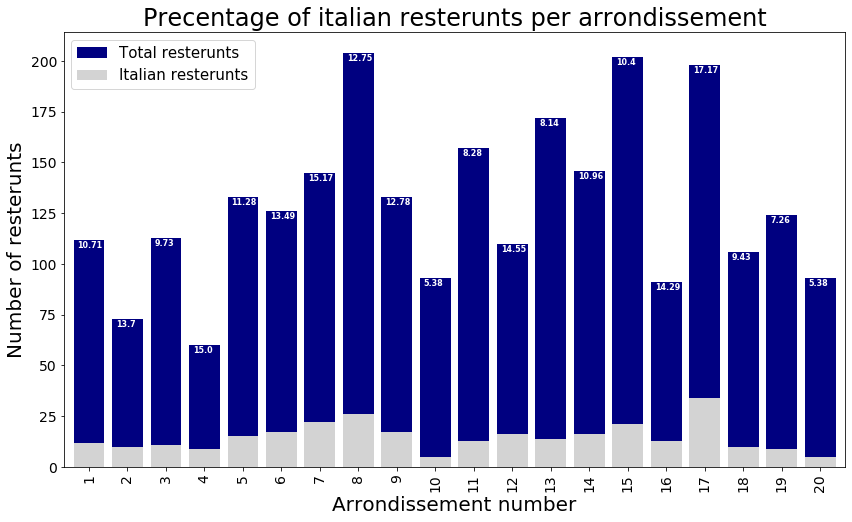

In [386]:
restaurant_count=df_restaurants.groupby(['arrondissement_number']).agg({'is_italian': [lambda x :(x==True).sum(),'count']})
restaurant_count.columns=['Italian resterunts','Total resterunts']
restaurant_count['italian_ratio']=round(100*restaurant_count['Italian resterunts']/restaurant_count['Total resterunts'],2)

restaurant_count['Total resterunts'].plot(kind='bar',figsize=(14,8),fontsize=14,color=['navy'], width=0.8)
restaurant_count['Italian resterunts'].plot(kind='bar',fontsize=14,color=['lightgrey'], width=0.8)

plt.xlabel('Arrondissement number',fontsize=20)
plt.ylabel('Number of resterunts',fontsize=20)
plt.title('Precentage of italian resterunts per arrondissement',fontsize=24)
plt.legend(fontsize=15)
for i in range(len(restaurant_count)): 
    plt.annotate(restaurant_count.iloc[i,2], xy=(i-0.3,restaurant_count.iloc[i,1]-4), color='white',fontsize=8,fontweight="bold")


Let's crete a map **showing heatmap / density** of restaurants and try to extract some meaningfull info from that. Also, let's show borders of Paris arrondissement on our map

In [387]:
# get latitude and longitude of resterunts
resterunt_latlons=df_restaurants[['venue_lat','venue_lng']]
resterunt_latlons=[[resterunt_latlons.iloc[i,0],resterunt_latlons.iloc[i,1]] for i in range(len(resterunt_latlons))]

# Get the latitude and longitude for italian resterunts only
italian_latlons=df_restaurants_italian[['venue_lat','venue_lng']]
italian_latlons=[[italian_latlons.iloc[i,0],italian_latlons.iloc[i,1]] for i in range(len(italian_latlons))]



In [519]:
from folium import plugins
from folium.plugins import HeatMap


paris_map = folium.Map(location=paris_center, zoom_start=13)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(paris_map)
HeatMap(resterunt_latlons).add_to(paris_map)
folium.Marker(paris_center).add_to(paris_map)
paris_map

Restaurant density can be seen to be high in all arrondissements, but a few low density pockets can be found throughout the city.

Let's create another **heatmap map showing heatmap/density of Italian restaurants** only.

In [520]:
from folium import plugins
from folium.plugins import HeatMap


paris_map = folium.Map(location=paris_center, zoom_start=13)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(paris_map)
HeatMap(italian_latlons).add_to(paris_map)
folium.Marker(paris_center).add_to(paris_map)

paris_map

This map is not so 'hot' (Italian restaurants represent a subset of ~11% of all restaurants in Paris) but it also indicates higher density of existing Italian restaurants directly **north and west** from paris_center,**east-wast** and **west-south**.
These heat maps can help us choose the best neighborhood for opening the resturant after we apply the segmentation of all the arrondissements

#### Density of Population per km^2

Tranform the density data into a *pandas* dataframe

In [390]:
df_density=pd.DataFrame([density]).transpose()
df_density.columns=['Population density']
df_density.index=np.arange(1,21)
df_density.index.name = 'arrondissement_number'
df_density

,Population density
arrondissement_number,
1,17400
2,23000
3,36100
4,27900
5,60000
6,43900
7,57800
8,40600
9,59400


#### Median household income

Tranform the Median household income data into a *pandas* dataframe

In [391]:
df_income=pd.DataFrame([income]).transpose()
df_income.columns=['Income']
df_income.index=np.arange(1,21)
df_income.index.name='arrondissement_number'
df_income

,Income
arrondissement_number,
1,38830
2,34130
3,36370
4,37560
5,38780
6,46770
7,50080
8,51970
9,38000


#### The top Paris arrondissements for tourists (ranked from worst to best)

Tranform the top Paris arrondissements data into a *pandas* dataframe

In [392]:
df_top_paris=pd.DataFrame([top_paris]).transpose()
df_top_paris.columns=['arrondissement_number']
df_top_paris['Grade']=np.linspace(0,100,20)
df_top_paris['Grade']=round(df_top_paris['Grade'],2)
df_top_paris

,arrondissement_number,Grade
rank 20,16,0.00
rank 19,15,5.26
rank 18,17,10.53
rank 17,13,15.79
rank 16,11,21.05
rank 15,19,26.32
rank 14,20,31.58
rank 13,14,36.84
rank 12,12,42.11
rank 11,10,47.37


#### Average rent per square meter (in euros)

Tranform the Average rent per square meter data into a *pandas* dataframe.

In [393]:
df_rent=pd.DataFrame([rent]).transpose()
df_rent.columns=['Rent']
df_rent.index=np.arange(1,21)
df_rent.index.name = 'arrondissement_number'
df_rent

,Rent
arrondissement_number,
1,30.8
2,30.0
3,30.0
4,30.4
5,29.3
6,30.4
7,30.5
8,28.3
9,26.7


#### Let's summarize the data shown above in bar plot

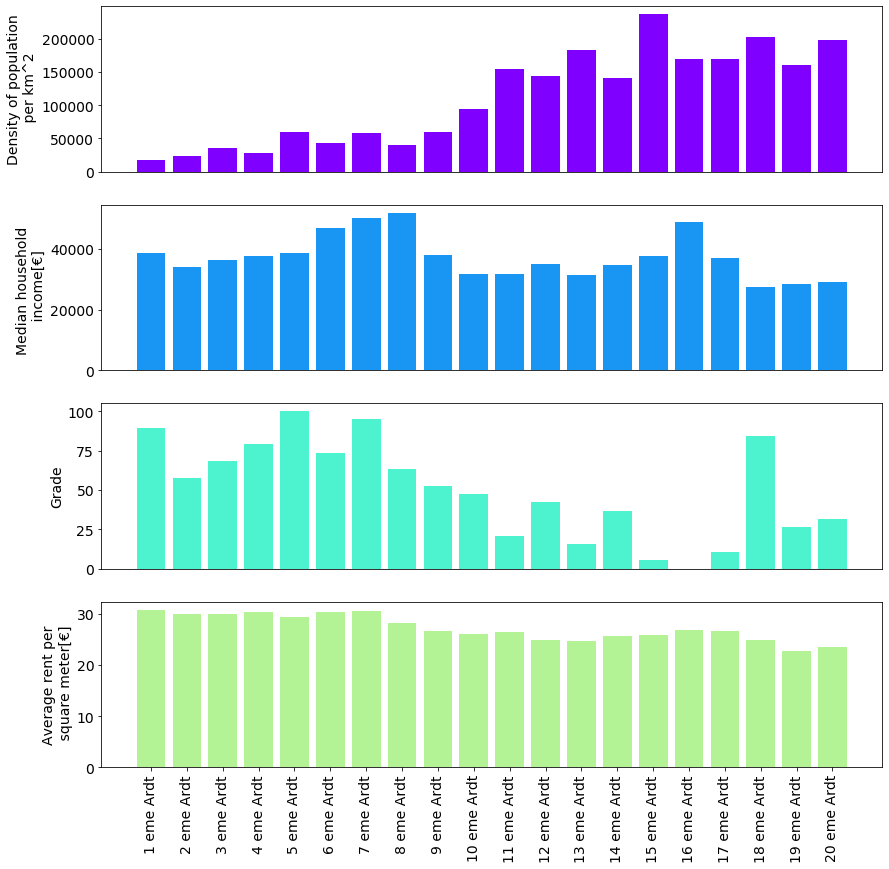

In [394]:
color=cm.rainbow(np.linspace(0,1,6))

fig=plt.figure(figsize=(14,14))
ax1=fig.add_subplot(4,1,1)
ax1.bar(list(density.keys()),density.values(),color=color[0])
ax1.set_ylabel('Density of population\n per km^2',fontsize=14)
ax1.set_xticks([])
ax1.tick_params(labelsize=14)


ax2=fig.add_subplot(4,1,2)
ax2.bar(list(income.keys()),income.values(),color=color[1])
ax2.set_ylabel('Median household \n income[€]',fontsize=14)
ax2.set_xticks([])
ax2.tick_params(labelsize=14)


ax3=fig.add_subplot(4,1,3)
ax3.bar(df_top_paris.arrondissement_number,df_top_paris.Grade,color=color[2])
ax3.set_ylabel('Grade',fontsize=14)
ax3.set_xticks([])
ax3.tick_params(labelsize=14)


ax4=fig.add_subplot(4,1,4)
ax4.bar(list(rent.keys()),rent.values(),color=color[3])
ax4.set_ylabel('Average rent per\n square meter[€]',fontsize=14)

xticks=np.arange(1, 21, step=1)
label=[(str(i)+' eme Ardt') for i in range(1,len(rent)+1)]
ax4.set_xticks(xticks)
ax4.set_xticklabels(label,rotation=90,fontsize=14)
ax4.tick_params(labelsize=14)
plt.show()

We can observe from these graphs a big variance in the first three parameters namely, **Density of population, Median household income and Grade,** between the different arrandosments.
In contrast, the **Average rent per square meter** does not vary significantly between thg different arrondissement.

We can support this claim by calculating the standard deviation (std) for each parameter:

In [395]:
print('Density of population (mean,std): ({:.2f},{:.2f})'.format(df_density['Population density'].mean(),df_density['Population density'].std()))
print('Median household income (mean,std): ({:.2f},{:.2f})'.format(df_income['Income'].mean(),df_income['Income'].std()))
print('Grade (mean,std): ({:.2f},{:.2f})'.format(df_top_paris['Grade'].mean(),df_top_paris['Grade'].std()))
print('\033[0;37;40m Average rent per square meter (mean,std): ({:.2f},{:.2f})'.format(df_rent['Rent'].mean(),df_rent['Rent'].std()))

Density of population (mean,std): (111075.00,71572.46)
Median household income (mean,std): (37285.50,7130.57)
Grade (mean,std): (50.00,31.14)
 Average rent per square meter (mean,std): (27.23,2.55)


#### Let's join the data shown above to one data frame

In [449]:
quartier_paris.head()

,quartier_number,quartier_name,arrondissement_number,Latitude,Longitude,Population density,Income,Rent,Grade,Italian resterunts,Total resterunts
0,27,Ecole-Militaire,7,48.850359,2.311031,57800,50080,30.5,94.74,22,145
1,59,Grenelle,15,48.850172,2.291853,237100,37840,25.9,5.26,21,202
2,61,Auteuil,16,48.850622,2.252277,170000,48750,26.9,0.00,13,91
3,12,Sainte-Avoie,3,48.862557,2.354852,36100,36370,30.0,68.42,11,113
4,40,Hôpital-Saint-Louis,10,48.876008,2.368123,94000,31810,26.1,47.37,5,93


In [397]:
quartier_paris=quartier_paris.join(df_density,on='arrondissement_number')
quartier_paris=quartier_paris.join(df_income,on='arrondissement_number')
quartier_paris=quartier_paris.join(df_rent,on='arrondissement_number')
quartier_paris=quartier_paris.join(df_top_paris.set_index('arrondissement_number'),on='arrondissement_number')
quartier_paris=quartier_paris.join(restaurant_count[['Italian resterunts','Total resterunts']],on='arrondissement_number')
quartier_paris


,quartier_number,quartier_name,arrondissement_number,Latitude,Longitude,Population density,Income,Rent,Grade,Italian resterunts,Total resterunts
0,27,Ecole-Militaire,7,48.850359,2.311031,57800,50080,30.5,94.74,22,145
1,59,Grenelle,15,48.850172,2.291853,237100,37840,25.9,5.26,21,202
2,61,Auteuil,16,48.850622,2.252277,170000,48750,26.9,0.00,13,91
3,12,Sainte-Avoie,3,48.862557,2.354852,36100,36370,30.0,68.42,11,113
4,40,Hôpital-Saint-Louis,10,48.876008,2.368123,94000,31810,26.1,47.37,5,93
5,77,Belleville,20,48.871531,2.387549,198000,28970,23.5,31.58,5,93
6,65,Ternes,17,48.881178,2.289964,170170,37000,26.7,10.53,34,198
7,14,Saint-Gervais,4,48.855719,2.358162,27900,37560,30.4,78.95,9,60
8,25,Saint-Thomas-d'Aquin,7,48.855263,2.325588,57800,50080,30.5,94.74,22,145
9,38,Porte-Saint-Denis,10,48.873618,2.352283,94000,31810,26.1,47.37,5,93


In [399]:
# drop unnecessary columns
quartier_paris_grouped=quartier_paris.drop(['quartier_name','Latitude','Longitude'],1)

# drop the duplicate rows
quartier_paris_grouped=quartier_paris_grouped.drop_duplicates(keep='first',subset=quartier_paris_grouped.columns[1:7]).reset_index(drop=True)

quartier_paris_grouped

,quartier_number,arrondissement_number,Population density,Income,Rent,Grade,Italian resterunts,Total resterunts
0,27,7,57800,50080,30.5,94.74,22,145
1,59,15,237100,37840,25.9,5.26,21,202
2,61,16,170000,48750,26.9,0.00,13,91
3,12,3,36100,36370,30.0,68.42,11,113
4,40,10,94000,31810,26.1,47.37,5,93
5,77,20,198000,28970,23.5,31.58,5,93
6,65,17,170170,37000,26.7,10.53,34,198
7,14,4,27900,37560,30.4,78.95,9,60
8,1,1,17400,38830,30.8,89.47,12,112
9,73,19,160100,28400,22.7,26.32,9,124


### Cluster Neighborhoods and Exmine clusters 


Let us now cluster the arrondissement of paris to identifying similar arrondissement and their properties based on the dataset.

#### Normalizing over the standard deviation
Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally.

In [528]:
from sklearn.preprocessing import StandardScaler

# extract the necessary data for clustering
X=quartier_paris_grouped.iloc[:,2:8].values

# normalize the data
X = StandardScaler().fit_transform(X)

Let's determine the optimal value of K for our dataset using the Elbow and average silhouette methods.

**Average silhouette method:**

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.
For each observation i, the silhouette width si is calculated as follows:
Si=(bi−ai)/max(ai,bi), where:
ai = The mean distance between a sample and all other points in the same class.
bi = The mean distance between a sample and all other points in the next nearest cluster.
Finally the we calculate the mean Silhouette Coefficient over all samples.

**Elbow method:**

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k and for each value of k calculate the sum of squared errors (SSE). SSE is defined as the sum of the squared distance between centroid and each member of the cluster.

In [511]:
from sklearn.metrics import silhouette_score
sil_coeff_arr=[]
distortions_arr=[]
k=range(2, 20)
for n in k:
    k_means = KMeans(init="k-means++", n_clusters=n, n_init=12)
    k_means.fit(X)
    label = k_means.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    sil_coeff_arr.append(sil_coeff)
    distortions=k_means.inertia_
    distortions_arr.append(distortions)
    print("For n_clusters={}, The Silhouette Coefficient is {}, distortions is {} ".format(n, sil_coeff,distortions))

For n_clusters=2, The Silhouette Coefficient is 0.34808767661025747, distortions is 70.5346814253817 
For n_clusters=3, The Silhouette Coefficient is 0.33664723637926885, distortions is 51.528553142537774 
For n_clusters=4, The Silhouette Coefficient is 0.32617938107344896, distortions is 38.68924333057027 
For n_clusters=5, The Silhouette Coefficient is 0.30049763429530774, distortions is 29.393662165596723 
For n_clusters=6, The Silhouette Coefficient is 0.3043661054313145, distortions is 22.78557257153294 
For n_clusters=7, The Silhouette Coefficient is 0.2330973044474424, distortions is 19.55278061170626 
For n_clusters=8, The Silhouette Coefficient is 0.22622557334089777, distortions is 16.44160840519689 
For n_clusters=9, The Silhouette Coefficient is 0.21692567389727543, distortions is 13.685752807219387 
For n_clusters=10, The Silhouette Coefficient is 0.19221090490684775, distortions is 10.80521722469091 
For n_clusters=11, The Silhouette Coefficient is 0.21128091037420238, di

The following graph represents the average Silhouette Coefficient and sum of squared distance as a function of the number of clusters.

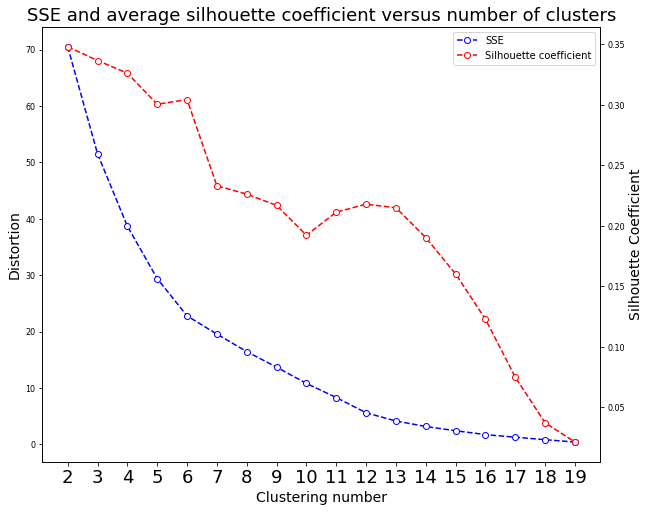

In [512]:
fig=plt.figure(figsize=(10,8))
ax0=fig.add_subplot(1,1,1)
ax0.plot(k, distortions_arr, linestyle='--', color='b',marker='o',markerfacecolor='w',label='SSE')
ax0.set_xlabel('Clustering number',fontsize=14)
ax0.set_ylabel('Distortion',fontsize=14)

ax1 = ax0.twinx() 
ax1.plot(k, sil_coeff_arr,linestyle='--',color='r',marker='o',markerfacecolor='w',label='Silhouette coefficient')
ax1.set_xlabel('k')
ax1.set_ylabel('Silhouette Coefficient',fontsize=14)
ax1.set_title('SSE and average silhouette coefficient versus number of clusters',fontsize=18)
ax1.set_xticks(k)

ax0.plot(np.nan, linestyle='--',color='r',marker='o',markerfacecolor='w',label='Silhouette coefficient')  # Make an agent in ax
ax0.legend(loc=0)
plt.show()


Generally, a higher average silhouette coefficient indicates better clustering quality. In this view,
the optimal clustering number of arrondissement in the study area should be 2, at which the value of the
average silhouette coefficient is highest. However, the SSE of this clustering solution (k = 2) is too
large. At k = 5, the SSE is much lower. In addition, the value of the average silhouette coefficient at
k = 5 is also very high, which is just lower than k = 2. Thus, we use the clustering result at k = 5.

Run k-means to cluster the neighborhood into 5 clusters and assign the labels to each row in dataframe.

In [522]:
# set number of clusters
kclusters = 6

# run k-means clustering
k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=12)
k_means.fit(X)

# assign the labels
label = k_means.labels_
quartier_paris_grouped['Label']=label

We can easily check the centroid values by averaging the features in each cluster.

In [523]:
quartier_paris_grouped.groupby('Label').mean().iloc[:,2:8]

,Population density,Income,Rent,Grade,Italian resterunts,Total resterunts
Label,,,,,,
0,163800.000000,29195.000000,24.300000,47.370000,7.250000,104.000000
1,32880.000000,37134.000000,30.100000,78.946000,11.400000,98.200000
2,203635.000000,37420.000000,26.300000,7.895000,27.500000,200.000000
3,136466.000000,34170.000000,25.660000,33.684000,15.200000,143.600000
4,47433.333333,49606.666667,29.733333,77.193333,21.666667,158.333333
5,170000.000000,48750.000000,26.900000,0.000000,13.000000,91.000000


Now we can create a profile for each group, considering the common characteristics of each cluster.
As we can observe in the above table clousters number 2 and 3 suggest the best option t

Let us now join the labels to quartier_paris data frame

In [524]:
quartier_paris_grouped.head()

,quartier_number,arrondissement_number,Population density,Income,Rent,Grade,Italian resterunts,Total resterunts,Label
0,27,7,57800,50080,30.5,94.74,22,145,4
1,59,15,237100,37840,25.9,5.26,21,202,2
2,61,16,170000,48750,26.9,0.00,13,91,5
3,12,3,36100,36370,30.0,68.42,11,113,1
4,40,10,94000,31810,26.1,47.37,5,93,0


In [525]:
quartier_paris.head()

,quartier_number,quartier_name,arrondissement_number,Latitude,Longitude,Population density,Income,Rent,Grade,Italian resterunts,Total resterunts
0,27,Ecole-Militaire,7,48.850359,2.311031,57800,50080,30.5,94.74,22,145
1,59,Grenelle,15,48.850172,2.291853,237100,37840,25.9,5.26,21,202
2,61,Auteuil,16,48.850622,2.252277,170000,48750,26.9,0.00,13,91
3,12,Sainte-Avoie,3,48.862557,2.354852,36100,36370,30.0,68.42,11,113
4,40,Hôpital-Saint-Louis,10,48.876008,2.368123,94000,31810,26.1,47.37,5,93


In [526]:
quartier_paris_labeled=quartier_paris.join(quartier_paris_grouped.set_index('arrondissement_number').iloc[:,7],on='arrondissement_number')
quartier_paris_labeled.head()

,quartier_number,quartier_name,arrondissement_number,Latitude,Longitude,Population density,Income,Rent,Grade,Italian resterunts,Total resterunts,Label
0,27,Ecole-Militaire,7,48.850359,2.311031,57800,50080,30.5,94.74,22,145,4
1,59,Grenelle,15,48.850172,2.291853,237100,37840,25.9,5.26,21,202,2
2,61,Auteuil,16,48.850622,2.252277,170000,48750,26.9,0.00,13,91,5
3,12,Sainte-Avoie,3,48.862557,2.354852,36100,36370,30.0,68.42,11,113,1
4,40,Hôpital-Saint-Louis,10,48.876008,2.368123,94000,31810,26.1,47.37,5,93,0


Finally, let's visualize the resulting clusters on the heatmap/density of Italian restaurants.

In [527]:
map_cluster=folium.Map(location=paris_center,zoom_start=13)
num_of_cluster=len(quartier_paris_labeled.loc[:,'Label'].unique())

rainbow=cm.rainbow(np.linspace(0,1,num_of_cluster))
for index,row in quartier_paris_labeled.iterrows():
    col=colors.rgb2hex(rainbow[row.Label])
    lat=row.Latitude
    lng=row.Longitude
    label='{}, arrondissement: {}, Cluster {}.'.format(row.quartier_name,row.arrondissement_number,row.Label)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker([lat,lng],radius=5,fill=True,color=col,fill_opacity=1, popup=label).add_to(map_cluster)

paris_arrondissement_url = 'https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson'
paris_arrondissement = requests.get(paris_arrondissement_url).json()
folium.GeoJson(paris_arrondissement, style_function=boroughs_style, name='geojson').add_to(map_cluster)
HeatMap(italian_latlons).add_to(map_cluster)
map_cluster

Our analysis shows that although 

I guess it's not a surprise that these districts are all very centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

Inferences
We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

Conclusions
There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorythms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

Thanks for taking part in my Data Science journey!